In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')

df_train.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive


# Checking for missing values

In [2]:
print(df_train.isna().sum())

tweet_id       0
user_handle    0
timestamp      0
tweet_text     0
candidate      0
party          0
retweets       0
likes          0
sentiment      0
dtype: int64


# Checking for duplicates

NO NULL VALUES FOUND

In [3]:
print(df_train.duplicated().sum())
df_train.drop_duplicates(inplace=True)

0


NO DUPLICATES FOUND

# Conversion of categorical sentiment values into numerical values

In [4]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df_train['sentiment'] = df_train['sentiment'].map(sentiment_mapping)

In [5]:
df_train['sentiment'].isna().sum()

1

ONE ROW WASNT MAPPED PROPERLY, DROP IT

In [6]:
df_train.dropna(subset=['sentiment'], inplace=True)

In [7]:
df_train['sentiment'] = df_train['sentiment'].astype(int)

In [8]:
df_train['sentiment'].isna().sum()

0

# Normalizing numerical features

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['retweets', 'likes']] = scaler.fit_transform(df_train[['retweets', 'likes']])

In [10]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])

In [11]:
df_train

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,2.011529,1.667256,1
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,0.748357,0.422613,1
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,-0.153910,-0.407149,1
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,-0.875723,-0.822030,0
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,-1.236629,-1.070958,1
...,...,...,...,...,...,...,...,...,...
495,496,@user1067,2024-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,1.109263,0.920470,1
496,497,@econTalk7,2024-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,1.289716,1.584280,0
497,498,@greenFutureNow7,2024-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,0.387450,-0.075244,1
498,499,@indiePerspective7,2024-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,-1.669717,-1.361375,0


# Checking for trends

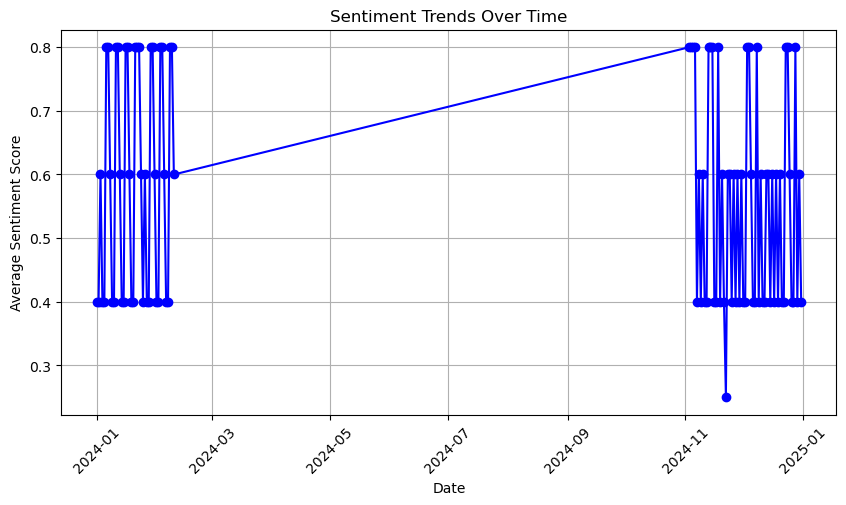

In [ ]:
import matplotlib.pyplot as plt

# Average sentiment scores per day
df_daily = df_train.groupby(df_train['timestamp'].dt.date)['sentiment'].mean()

# Plot the sentiment trend over time
plt.figure(figsize=(10,5))
plt.plot(df_daily.index, df_daily.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Timestamp values are improper

In [13]:
broken_index = df_train[df_train['timestamp'] < df_train['timestamp'].shift()].index
broken_index

Index([295], dtype='int64')

In [14]:
df_train.loc[295:, 'timestamp'] = df_train.loc[295:, 'timestamp'].apply(lambda x: x.replace(year=2025) if x.year == 2024 else x)

# Timestamp has been corrected

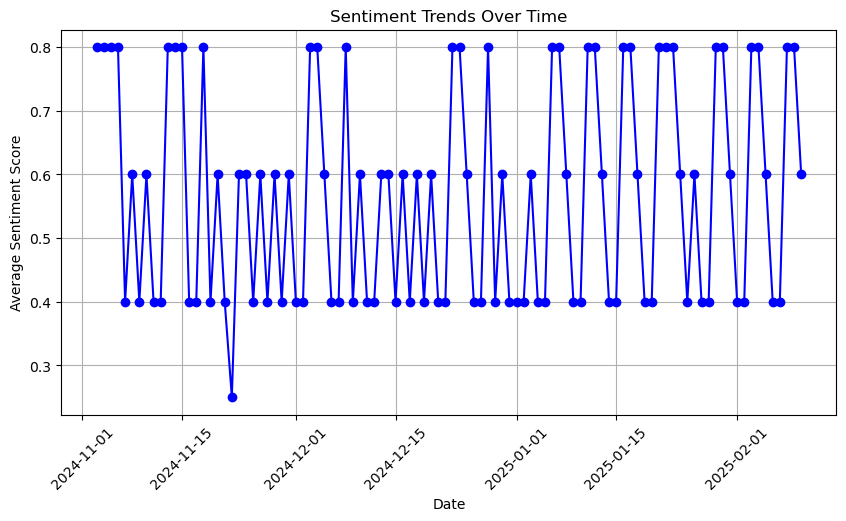

In [ ]:
# Average sentiment scores per day
df_daily = df_train.groupby(df_train['timestamp'].dt.date)['sentiment'].mean()

# Plot the sentiment trend over time
plt.figure(figsize=(10,5))
plt.plot(df_daily.index, df_daily.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [16]:
correlation = df_train['likes'].corr(df_train['retweets'])

print("Correlation between likes and retweets is : ", correlation)

Correlation between likes and retweets is :  0.971527283182818


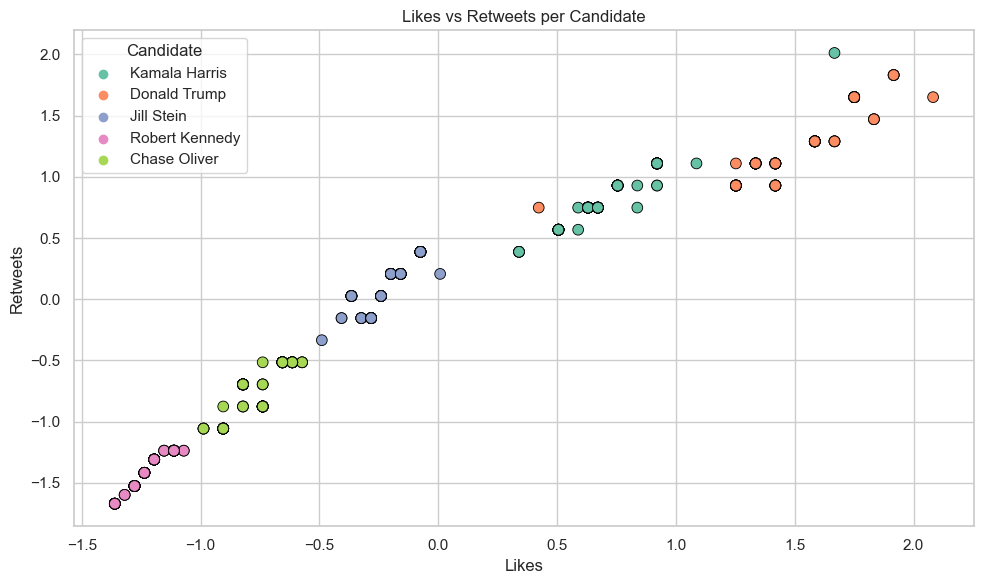

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create scatter plot based on candidate
sns.scatterplot(
    data=df_train,
    x='likes',
    y='retweets',
    hue='candidate',
    palette='Set2',
    s=60,
    edgecolor='black'
)

plt.title('Likes vs Retweets per Candidate')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.legend(title='Candidate')
plt.tight_layout()
plt.show()


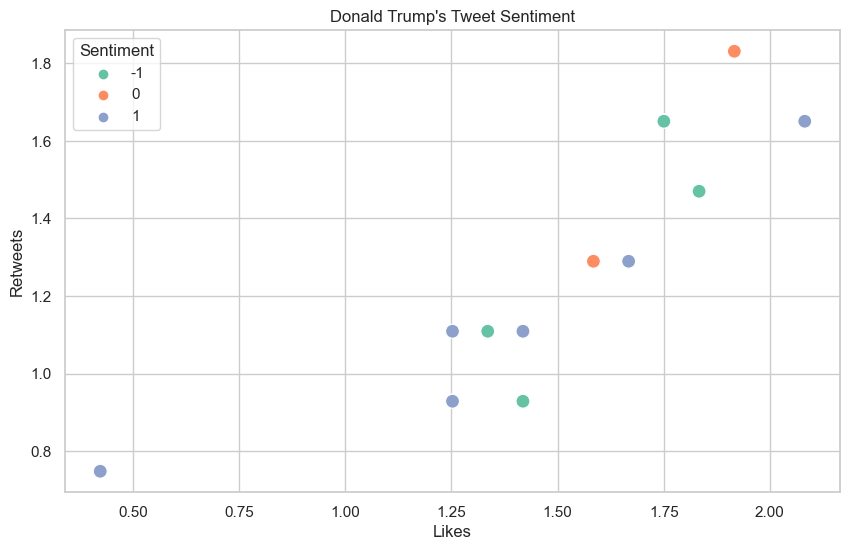

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only Donald Trump's data
trump_df = df_train[df_train['candidate'] == 'Donald Trump']

# Plot with different colors for each sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trump_df, x='likes', y='retweets', hue='sentiment', palette='Set2', s=100)

plt.title("Donald Trump's Tweet Sentiment")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

# Trend of average sentiment scores for each candidate

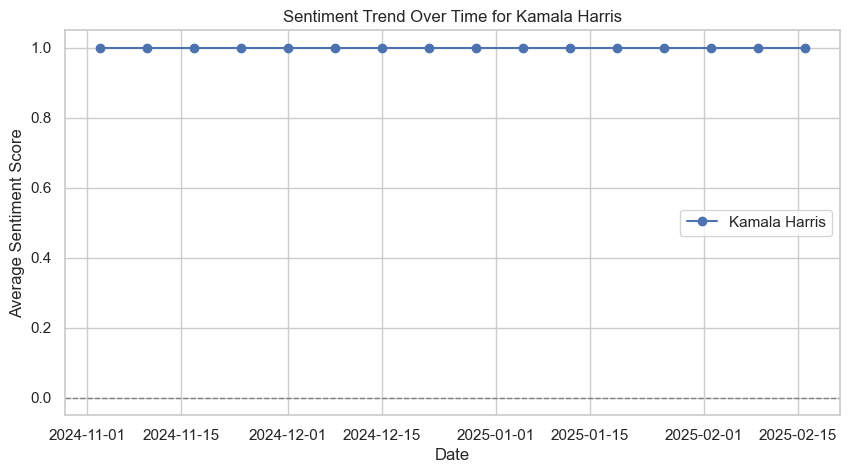

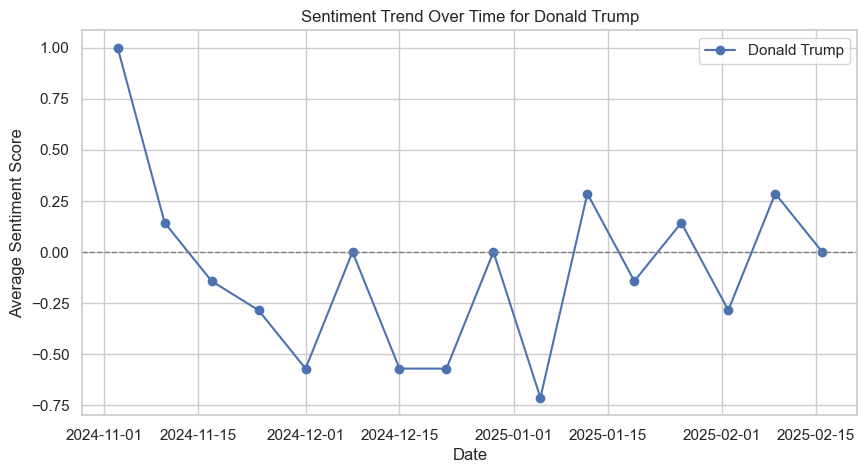

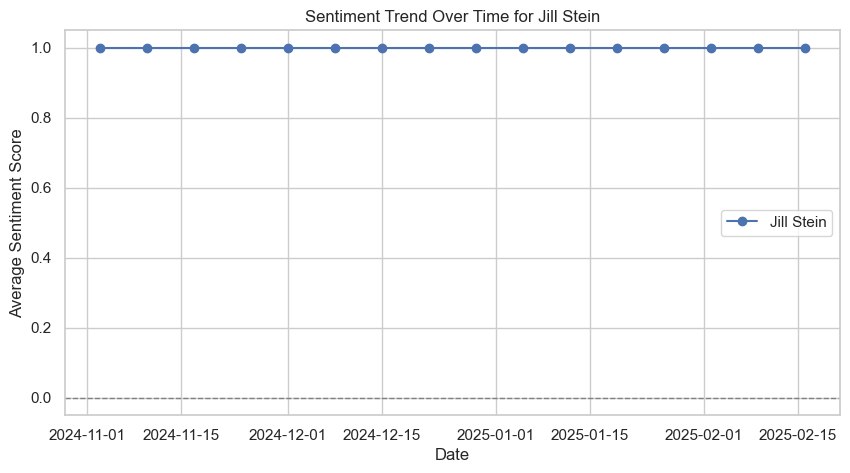

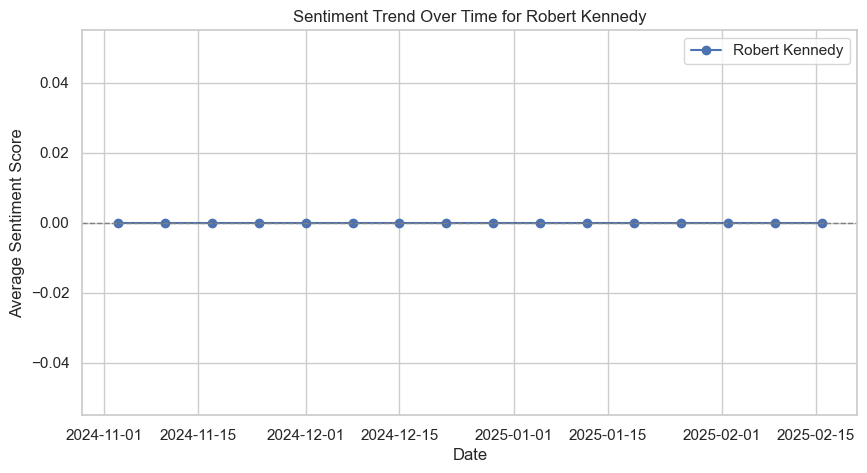

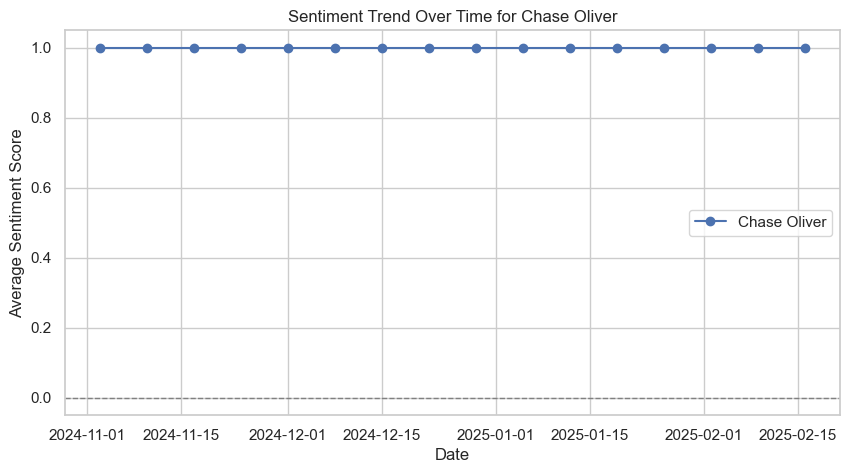

In [18]:
import matplotlib.pyplot as plt  
import pandas as pd  

# Ensure timestamp is in datetime format
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])

# Get unique candidates
candidates = df_train['candidate'].unique()

# Plot sentiment trends for each candidate
for candidate in candidates:
    plt.figure(figsize=(10, 5))
    
    # Filter data for the candidate
    candidate_df = df_train[df_train['candidate'] == candidate]
    
    # Resample by week and take the mean sentiment score
    sentiment_trend = candidate_df.set_index('timestamp')['sentiment'].resample('W').mean()
    
    # Plot
    plt.plot(sentiment_trend, marker='o', linestyle='-', label=candidate, color='b')
    
    # Labels and title
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Score')
    plt.title(f'Sentiment Trend Over Time for {candidate}')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Reference line at 0
    plt.legend()
    
    # Show graph
    plt.show()

In [19]:
df_train['candidate'].value_counts()

candidate
Kamala Harris     100
Donald Trump      100
Jill Stein        100
Robert Kennedy    100
Chase Oliver       99
Name: count, dtype: int64

In [20]:
kamala_df = df_train[df_train['candidate'] == 'Kamala Harris']
print(kamala_df['sentiment'].value_counts())

sentiment
1    100
Name: count, dtype: int64


In [21]:
trump_df = df_train[df_train['candidate'] == 'Donald Trump']
print(trump_df['sentiment'].value_counts())

sentiment
-1    45
 1    29
 0    26
Name: count, dtype: int64


In [22]:
stein_df = df_train[df_train['candidate'] == 'Jill Stein']
print(stein_df['sentiment'].value_counts())

sentiment
1    100
Name: count, dtype: int64


In [23]:
kennedy_df = df_train[df_train['candidate'] == 'Robert Kennedy']
print(kennedy_df['sentiment'].value_counts())

sentiment
0    100
Name: count, dtype: int64


In [24]:
oliver_df = df_train[df_train['candidate'] == 'Chase Oliver']
print(oliver_df['sentiment'].value_counts())

sentiment
1    99
Name: count, dtype: int64


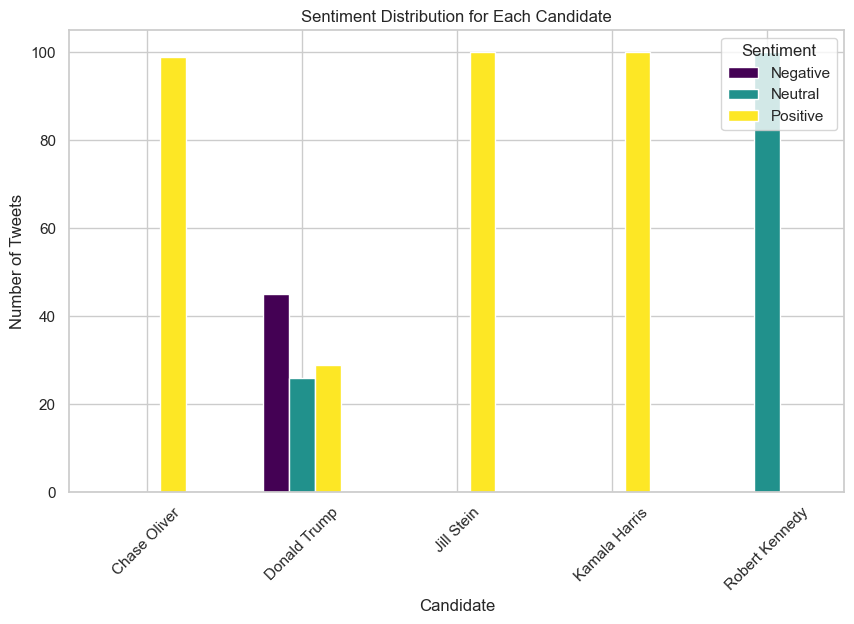

In [ ]:
sentiment_counts = df_train.groupby(['candidate', 'sentiment']).size().unstack(fill_value=0)

# Plot the bar chart
sentiment_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.xlabel('Candidate')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution for Each Candidate')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.show()

In [26]:
df_train.to_csv("train_preprocessed.csv")

In [27]:
df_val = pd.read_csv('val.csv')

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_val[['retweets', 'likes']] = scaler.fit_transform(df_val[['retweets', 'likes']])

In [29]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df_val['sentiment'] = df_val['sentiment'].map(sentiment_mapping)

In [30]:
df_val.to_csv("val_preprocessed.csv")

In [31]:
df_test = pd.read_csv('test.csv')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test[['retweets', 'likes']] = scaler.fit_transform(df_test[['retweets', 'likes']])
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df_test['sentiment'] = df_test['sentiment'].map(sentiment_mapping)
df_test.to_csv("test_preprocessed.csv")